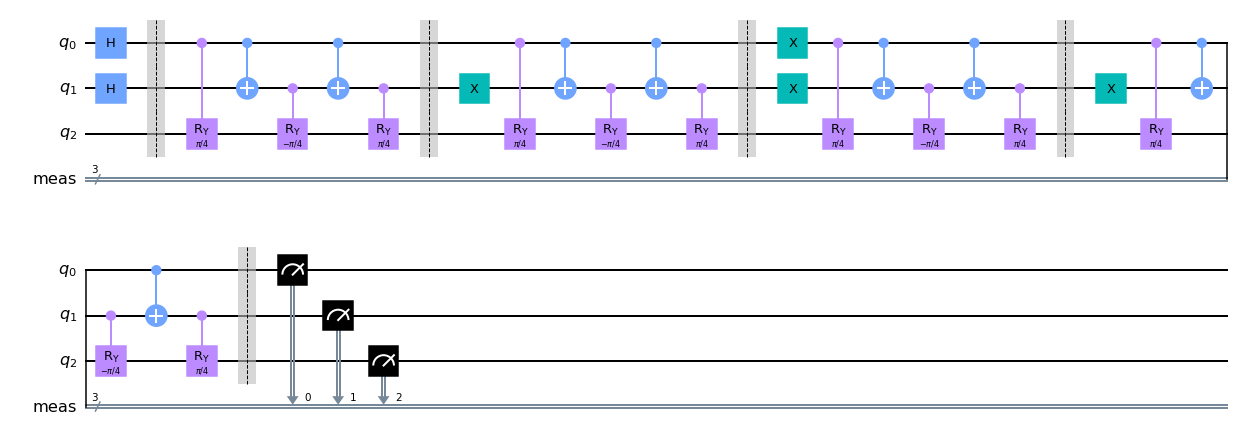

In [1]:
import numpy as np
import qiskit as qk
from qiskit import QuantumCircuit,transpile,Aer,IBMQ,assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.providers.aer import QasmSimulator
t=pi/4
qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.barrier()
qc.cry(t,0,2)
qc.cx(0,1)
qc.cry(-t,1,2)
qc.cx(0,1)
qc.cry(t,1,2)
qc.barrier()
qc.x(1)
qc.cry(t,0,2)
qc.cx(0,1)
qc.cry(-t,1,2)
qc.cx(0,1)
qc.cry(t,1,2)
qc.barrier()
qc.x(1)
qc.x(0)
qc.cry(t,0,2)
qc.cx(0,1)
qc.cry(-t,1,2)
qc.cx(0,1)
qc.cry(t,1,2)
qc.barrier()
qc.x(1)
qc.cry(t,0,2)
qc.cx(0,1)
qc.cry(-t,1,2)
qc.cx(0,1)
qc.cry(t,1,2)
qc.measure_all()
qc.draw()

{'001': 520, '010': 509, '110': 530, '100': 531, '101': 506, '111': 523, '000': 475, '011': 502}


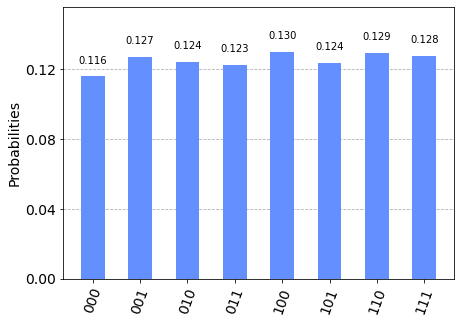

In [2]:
aer_sim=Aer.get_backend('aer_simulator')
t_qc=transpile(qc,aer_sim)
qobj=assemble(t_qc,shots=4096)
result=aer_sim.run(qobj).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)